In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Load the Combined Cycle Power Plant Dataset
# Replace 'your_csv_file.csv' with the actual CSV file name
csv_file_path = 'DL.csv'  # #Update
data = pd.read_csv(csv_file_path)

# Extract features and target variable
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values


# Split the data into training, validation, and test sets
# Use the same proportions as before: 70 : 20 : 10 for training : validation : testing
# Ensure training and validation data are interspersed, and test data is continuous chunks from the end

# Split the data into training and temporary sets (70% for training, 30% for temporary)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Split the temporary set into validation and test sets (20% for validation, 10% for testing)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.33, random_state=42)

# Now, X_train, y_train are for training
# X_val, y_val are for validation
# X_test, y_test are for testing

# Ensure training and validation data are interspersed, and test data is continuous chunks from the end
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.33, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Build the ANN model using TensorFlow and Keras
# Update the hyperparameters based on the best combination
model = keras.Sequential([
    keras.layers.Dense(units=64, activation='relu', input_dim=X_train.shape[1]),
    keras.layers.Dense(units=32, activation='relu'),
    keras.layers.Dense(units=1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
# Include validation_data to compute validation error at each epoch
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val))  # #Update

# Evaluate the model on the test set
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on Test Set: {mse}")

# Visualize training history if needed
# Plotting code...

# Save the model if needed
# model.save("your_model.h5")  # #Update


Epoch 1/50
210/210 [==============================] - 1s 2ms/step - loss: 182845.7031 - val_loss: 119417.5312
Epoch 2/50
210/210 [==============================] - 0s 938us/step - loss: 46889.4453 - val_loss: 16168.3643
Epoch 3/50
210/210 [==============================] - 0s 1ms/step - loss: 11754.5859 - val_loss: 7692.7227
Epoch 4/50
210/210 [==============================] - 0s 1ms/step - loss: 5092.5405 - val_loss: 3188.4377
Epoch 5/50
210/210 [==============================] - 0s 2ms/step - loss: 2094.5239 - val_loss: 1439.8113
Epoch 6/50
210/210 [==============================] - 0s 1ms/step - loss: 1018.9519 - val_loss: 782.0766
Epoch 7/50
210/210 [==============================] - 0s 1ms/step - loss: 588.2140 - val_loss: 474.2477
Epoch 8/50
210/210 [==============================] - 0s 989us/step - loss: 371.8723 - val_loss: 310.8383
Epoch 9/50
210/210 [==============================] - 0s 1ms/step - loss: 248.6413 - val_loss: 211.4344
Epoch 10/50
210/210 [=====================

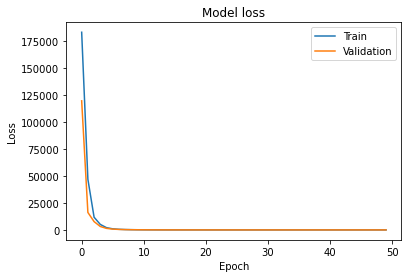

In [2]:
# Visualize training history
import matplotlib.pyplot as plt

# Plotting the training loss
plt.plot(history.history['loss'], label='Train')
# Plotting the validation loss
plt.plot(history.history['val_loss'], label='Validation')

# Set labels and title
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

# Display the legend in the upper right corner
plt.legend(loc='upper right')

# Show the plot
plt.show()
